In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from hmmlearn import hmm
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")


In [2]:
df = pd.read_csv("./Gia SMP va SMPcap 2021(Giá thị trường SMP).csv", encoding="latin-1", sep =';')
data2 = np.loadtxt("./Gia SMP va SMPcap 2021(Giá thị trường SMP).csv",encoding='latin-1', delimiter=';', skiprows=1, usecols=(7, 8, 9), dtype=float)
df.head()

,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


In [3]:
feats = ['7', '8', '9']
df[feats].head()

,7,8,9
0,964.4,964.4,964.4
1,1019.7,1019.7,1019.7
2,988.4,988.4,988.4
3,1002.0,1002.0,1002.1
4,1061.5,1061.5,1061.5


In [4]:
df[feats].dtypes

7    float64
8    float64
9    float64
dtype: object

In [18]:
# Khởi tạo HMM
model = hmm.GaussianHMM(n_components=2, covariance_type="diag", n_iter=1000, init_params='stmc')

# Huấn luyện HMM với dữ liệu quan sát
model.fit(data2)

# In ra các tham số của mô hình sau khi huấn luyện
print("Start probabilities: ", model.startprob_)
print("Transition matrix: ", model.transmat_)
print("Means: ", model.means_)
print("Covariances: ", model.covars_)

Start probabilities:  [1.00000000e+00 3.37166159e-54]
Transition matrix:  [[0.98533724 0.01466276]
 [0.2173913  0.7826087 ]]
Means:  [[1015.89239766 1015.89210526 1015.94532163]
 [1402.09565188 1402.09565188 1402.09565188]]
Covariances:  [[[1971.93195955    0.            0.        ]
  [   0.         1971.96069771    0.        ]
  [   0.            0.         1975.86548961]]

 [[5895.1661538     0.            0.        ]
  [   0.         5895.1661538     0.        ]
  [   0.            0.         5895.1661538 ]]]


In [19]:
# Dự đoán trạng thái ẩn cho các quan sát hiện có
hidden_states = model.predict(data2)
print("Hidden states: ", hidden_states)

# Lấy mẫu mới từ mô hình đã huấn luyện
X, Z = model.sample(5)  # Lấy mẫu 5 quan sát mới
print("Sampled observations: ", X)
print("Sampled hidden states: ", Z)

Hidden states:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Sampled observations:  [[1068.18220841 1013.80676695 1034.86886906]
 [ 946.96738092  984.9042821  1047.83178697]
 [ 982.90983841 1050.06558212 1046.52271136]
 [1008.74830052 1030.25889537  951.80366567]
 [ 991.27223363 1098.50326491 1046.42476

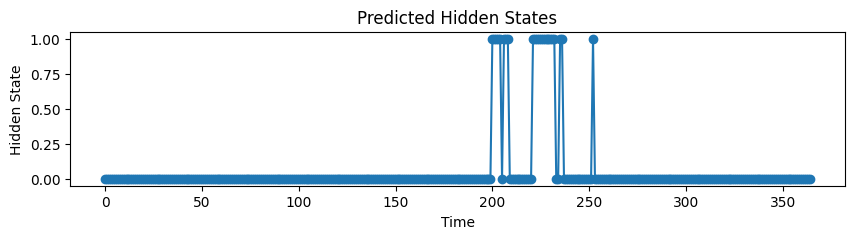

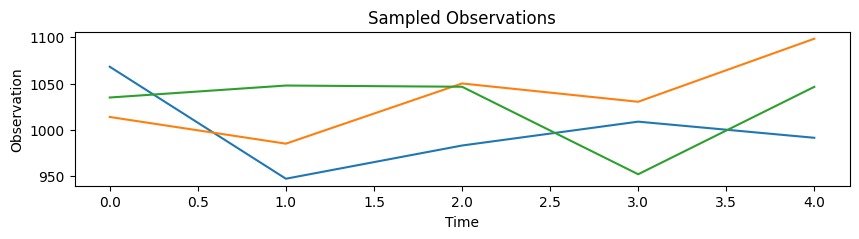

In [20]:
# Vẽ các trạng thái ẩn dự đoán
def plot_hidden_states(hidden_states, title):
    plt.figure(figsize=(10, 2))
    plt.plot(hidden_states, marker='o')
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Hidden State")
    plt.show()

plot_hidden_states(hidden_states, "Predicted Hidden States")

# Vẽ các quan sát mẫu
def plot_observations(observations, title):
    plt.figure(figsize=(10, 2)) 
    plt.plot(observations)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Observation")
    plt.show()

plot_observations(X, "Sampled Observations")


## Kalman


In [8]:
from pykalman import KalmanFilter
# Lấy dữ liệu cột 7, 8, 9
observations = df[feats].values

# Định nghĩa mô hình Kalman Filter
kf = KalmanFilter(initial_state_mean=np.mean(observations, axis=0),
                  n_dim_obs=3)

# Ước lượng trạng thái
state_means, state_covariances = kf.em(observations).filter(observations)

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Tính toán các chỉ số đánh giá
for i, col in enumerate(feats):
    mse = mean_squared_error(observations[:, i], state_means[:, i])
    mae = mean_absolute_error(observations[:, i], state_means[:, i])
    rmse = np.sqrt(mse)
    print(f'Column {col} - MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}')

Column 7 - MSE: 292.5848, MAE: 10.3005, RMSE: 17.1051
Column 8 - MSE: 292.5909, MAE: 10.3006, RMSE: 17.1053
Column 9 - MSE: 294.4686, MAE: 10.3378, RMSE: 17.1601


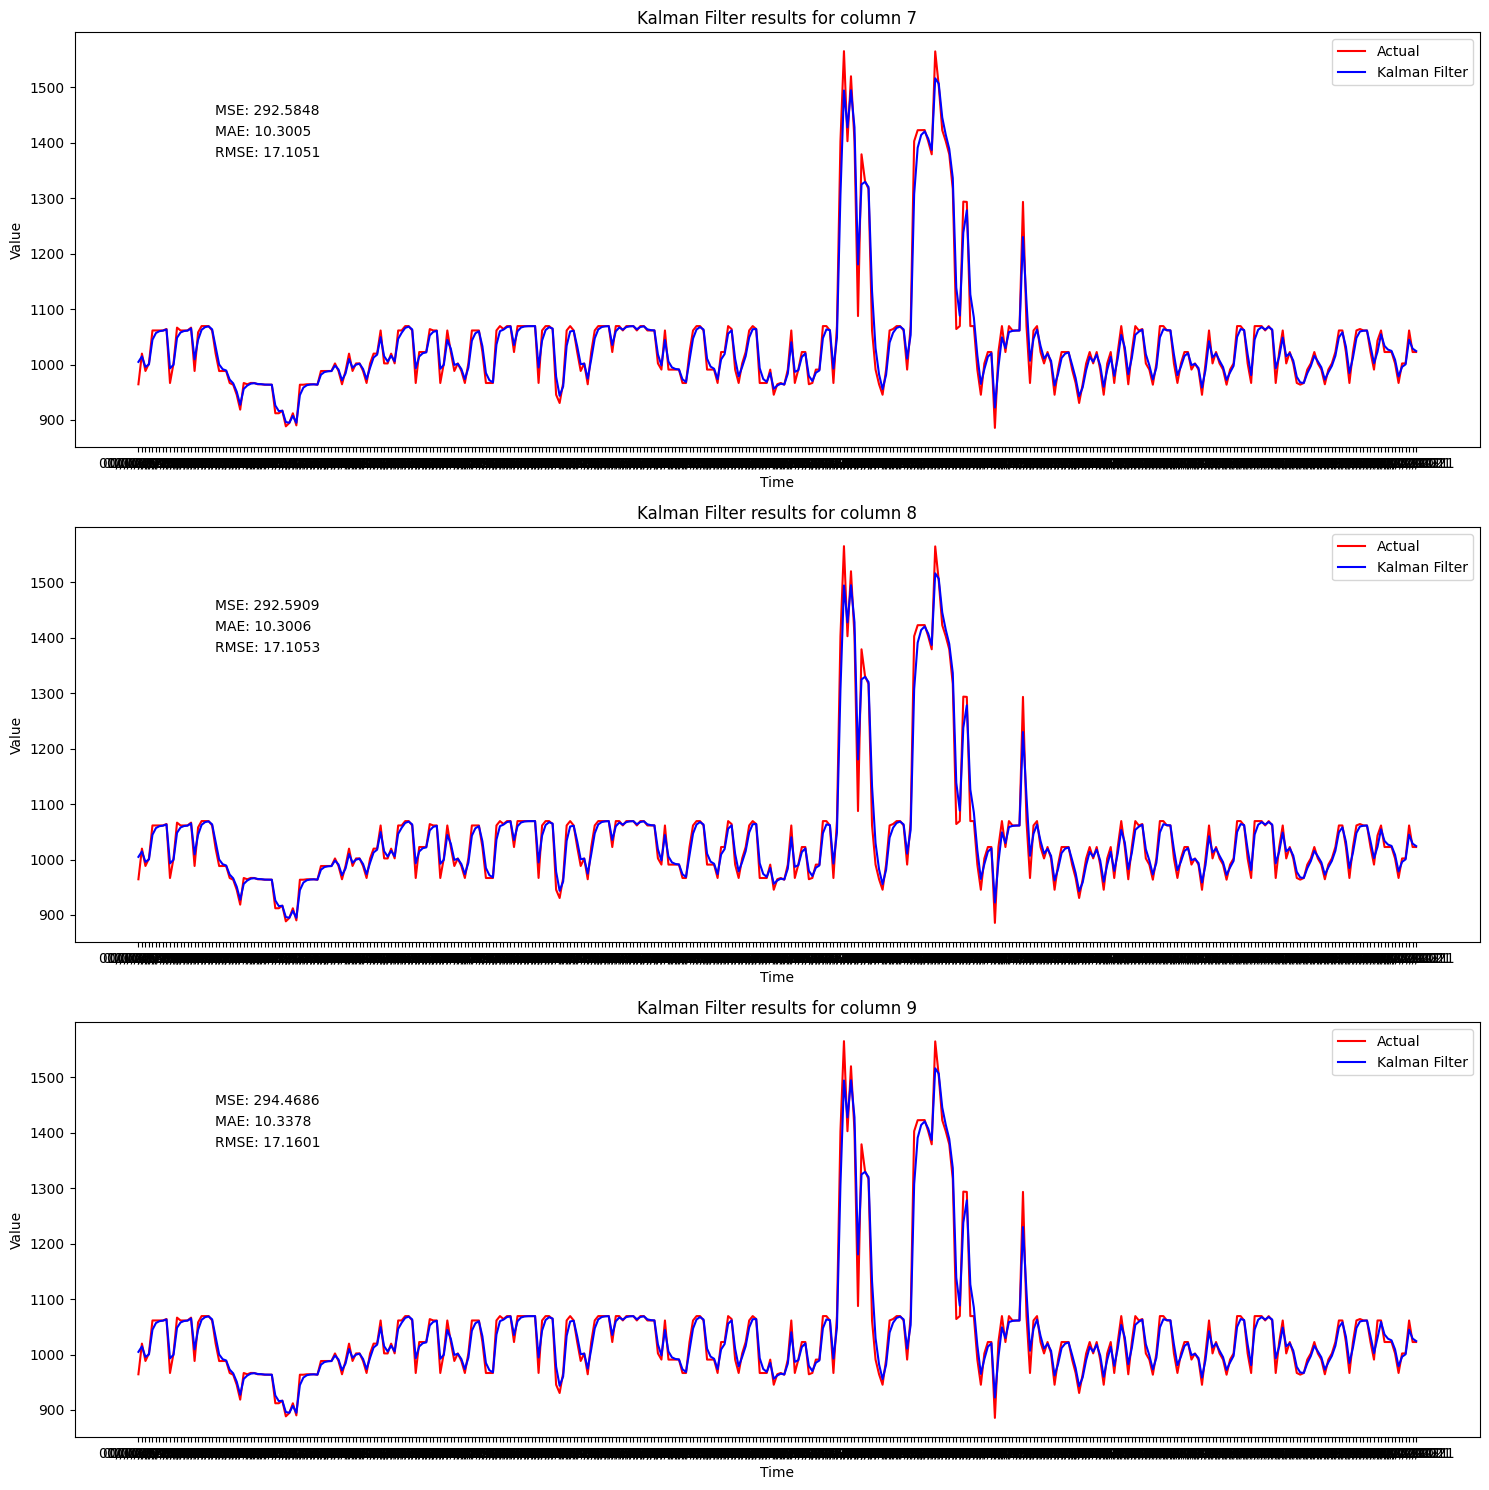

In [10]:
plt.figure(figsize=(15, 15))

for i, col in enumerate(feats):
    plt.subplot(len(feats), 1, i+1)
    plt.plot(df['Ngày'], observations[:, i], 'r', label='Actual')
    plt.plot(df['Ngày'], state_means[:, i], 'b', label='Kalman Filter')
    plt.title(f'Kalman Filter results for column {col}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()

    # Tính toán các chỉ số đánh giá
    mse = mean_squared_error(observations[:, i], state_means[:, i])
    mae = mean_absolute_error(observations[:, i], state_means[:, i])
    rmse = np.sqrt(mse)
    plt.text(0.1, 0.8, f'MSE: {mse:.4f}', transform=plt.gca().transAxes)
    plt.text(0.1, 0.75, f'MAE: {mae:.4f}', transform=plt.gca().transAxes)
    plt.text(0.1, 0.7, f'RMSE: {rmse:.4f}', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

In [22]:
# # Chuẩn hóa ma trận chuyển tiếp
# def normalize_transition_matrix(transition_matrix):
#     return transition_matrix / transition_matrix.sum(axis=1, keepdims=True)

# # Định nghĩa hàm markov_chain
# def markov_chain(transmat, state, state_names, samples):
#     (rows, cols) = transmat.shape 
#     rvs = [] 
#     values = list(np.arange(0, rows))

#     # Tạo các biến ngẫu nhiên cho mỗi hàng của ma trận chuyển tiếp
#     for r in range(rows): 
#         rv = stats.rv_discrete(name="row" + str(r), values=(values, transmat[r]))
#         rvs.append(rv)

#     # Bắt đầu từ trạng thái ban đầu và sau đó lấy mẫu biến ngẫu nhiên phù hợp
#     # dựa trên trạng thái theo sau các chuyển tiếp
#     states = [] 
#     for n in range(samples): 
#         state = rvs[state].rvs(size=1)[0]    
#         states.append(state_names[state])
#     return states

# def compute_transition_matrix(df2):
#     weather_states = []
#     for column in df2.columns[1:]:
#         for i in range(len(df2[column])-1):
#             if df2[column][i] < df2[column][i+1]:
#                 weather_states.append('S')  # Nắng
#             else:
#                 weather_states.append('C')  # Mây

#     transition_counts = {'S': {'S': 0, 'C': 0}, 'C': {'S': 0, 'C': 0}}
#     for i in range(len(weather_states)-1):
#         from_state = weather_states[i]
#         to_state = weather_states[i+1]
#         transition_counts[from_state][to_state] += 1

#     transition_matrix = np.zeros((2, 2))
#     for i, from_state in enumerate(['S', 'C']):
#         for j, to_state in enumerate(['S', 'C']):
#             transition_matrix[i, j] = transition_counts[from_state][to_state] / weather_states.count(from_state)

#     return transition_matrix

# # Tính toán ma trận chuyển tiếp từ dữ liệu 
# transmat = compute_transition_matrix(df[feats])
# transmat = normalize_transition_matrix(transmat)  # Chuẩn hóa ma trận chuyển tiếp

# # Gọi hàm markov_chain để tạo mẫu dữ liệu dựa trên ma trận chuyển tiếp
# samples = markov_chain(transmat, 0, ['S', 'C'], 365)

# # In ra mẫu dữ liệu 
# print(samples)


In [21]:
# # Hàm vẽ biểu đồ cho dữ liệu mẫu dự đoán
# def plot_samples(samples, title):
#     plt.figure(figsize=(10, 2))
#     plt.plot(samples, marker='o')
#     plt.title(title)
#     plt.xlabel("Time")
#     plt.ylabel("Sampled State")
#     plt.show()

# # Gọi hàm để vẽ biểu đồ
# plot_samples(samples, "Sampled States")